In [1]:
import pandas as pd
import nltk
import json  
import sys  

import seaborn as sns  
import matplotlib.pyplot as plt  

from nltk.stem.snowball import EnglishStemmer
import plotly.express as px  

# nltk.download('punkt')
# nltk.download('stopwords')

import pandas as pd  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.decomposition import PCA  
from sklearn.manifold import TSNE  
from umap import UMAP  # UMAP peut nécessiter une installation: !pip install umap-learn  
import matplotlib.pyplot as plt  
import seaborn as sns  
from nltk.stem import SnowballStemmer  
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  

## Recupérer et explorer les données

La première chose que je fais est de lire mon fichier d'entrée, lire la colonne description et rajouter deux colonnes:
- word_count > Compte le nombre total de mot dans la colonne description
- unique_word_count > Compte le nombre unique de mot dans la colonne description

J'affiche ensuite les 20 produits qui ont le plus de mots et je rajoute le nombre de mot unique.

In [2]:
df = pd.read_csv("./../input/df_cleaned.csv")

In [3]:
print("Shape is", df.shape)
df.head()

Shape is (1050, 15)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [9]:
df.head()

,product_name,product_category_tree,description,category_lvl_1,category_lvl_2,category_lvl_3,category_lvl_4,category_lvl_5,category_lvl_6,category_lvl_7
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,home furnishing,curtains & accessories,curtains,elegance polyester multicolor abstract eyelet ...,NaN,NaN,NaN
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,baby care,baby bath & skin,baby bath towels,sathiyas baby bath towels,"sathiyas cotton bath towel (3 bath towel, red,...",NaN,NaN
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,baby care,baby bath & skin,baby bath towels,eurospa baby bath towels,eurospa cotton terry face towel set (20 piece ...,NaN,NaN
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,home furnishing,bed linen,bedsheets,santosh royal fashion bedsheets,santosh royal fashion cotton printed king size...,NaN,NaN
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,home furnishing,bed linen,bedsheets,jaipur print bedsheets,jaipur print cotton floral king sized double b...,NaN,NaN


In [10]:
df.isna().sum()

product_name               0
product_category_tree      0
description                0
category_lvl_1             0
category_lvl_2             0
category_lvl_3             3
category_lvl_4           371
category_lvl_5           645
category_lvl_6           923
category_lvl_7           993
dtype: int64

In [11]:
df["category_lvl_3"].fillna("undefined",inplace=True)
df["category_lvl_4"].fillna("undefined",inplace=True)
df["category_lvl_5"].fillna("undefined",inplace=True)
df["category_lvl_6"].fillna("undefined",inplace=True)
df["category_lvl_7"].fillna("undefined",inplace=True)
df.isna().sum()


product_name             0
product_category_tree    0
description              0
category_lvl_1           0
category_lvl_2           0
category_lvl_3           0
category_lvl_4           0
category_lvl_5           0
category_lvl_6           0
category_lvl_7           0
dtype: int64

Je regarde la distribution de mes valeurs

In [12]:
df['category_lvl_1'].value_counts()

home furnishing               150
baby care                     150
watches                       150
home decor & festive needs    150
kitchen & dining              150
beauty and personal care      150
computers                     150
Name: category_lvl_1, dtype: int64

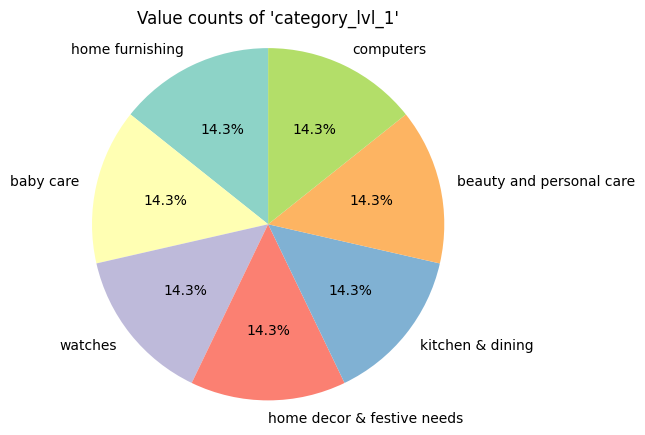

In [13]:
# Assuming 'df' is your DataFrame  
category_counts = df['category_lvl_1'].value_counts()  
  
# Set color palette from seaborn  
colors = sns.color_palette('Set3')  
  
# Create pie chart  
plt.figure(figsize=(5, 5))  
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)  
plt.axis('equal')  
plt.title("Value counts of 'category_lvl_1'")  
  
# Show the chart  
plt.show()  

La distribution est similaire pour chaque produits, j'affiche la 2e catégorie via le graphique sunburst

In [14]:
fig = px.sunburst(df, path=['category_lvl_1', 'category_lvl_2'])

fig.update_layout(  
    margin=dict(t=0, l=0, r=0, b=0),  
    width=500,  
    height=500,  
    title="Zoomable Sunburst Chart"  
)  

fig.show()

Je visualize avec Treemap pour observer la différence de rendu avec sunburst pour utiliser lors de la présentation

In [15]:
fig = px.treemap(df, path=['category_lvl_1', 'category_lvl_2', 'category_lvl_3'])  
  
fig.update_layout(  
    margin=dict(t=0, l=0, r=0, b=0),  
    width=800,  
    height=600,  
    title="Treemap Chart"  
)  
  
fig.show()

In [16]:
def analyse_one_document(row):
    text = row["description"]
    
    # Only get alphanumerical characters
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    
    # Tokenize the text
    token_data = tokenizer.tokenize(text.lower())

    # Get the frequency of words
    frequency = nltk.FreqDist(token_data)
    
    # print(type(text))
    # print("Total values", len(token_data))
    # print(frequency)
    
    return (frequency, token_data)


In [17]:
for idx, item in df.iterrows():
    (frequency, token_data) = analyse_one_document(item)
    df.at[idx, 'word_count'] = len(token_data)
    df.at[idx, 'unique_word_count'] = len(frequency.keys())

In [18]:
df.head()

,product_name,product_category_tree,description,category_lvl_1,category_lvl_2,category_lvl_3,category_lvl_4,category_lvl_5,category_lvl_6,category_lvl_7,word_count,unique_word_count
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,home furnishing,curtains & accessories,curtains,elegance polyester multicolor abstract eyelet ...,undefined,undefined,undefined,236.0,132.0
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,baby care,baby bath & skin,baby bath towels,sathiyas baby bath towels,"sathiyas cotton bath towel (3 bath towel, red,...",undefined,undefined,74.0,48.0
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,baby care,baby bath & skin,baby bath towels,eurospa baby bath towels,eurospa cotton terry face towel set (20 piece ...,undefined,undefined,216.0,124.0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,home furnishing,bed linen,bedsheets,santosh royal fashion bedsheets,santosh royal fashion cotton printed king size...,undefined,undefined,143.0,73.0
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,home furnishing,bed linen,bedsheets,jaipur print bedsheets,jaipur print cotton floral king sized double b...,undefined,undefined,213.0,111.0


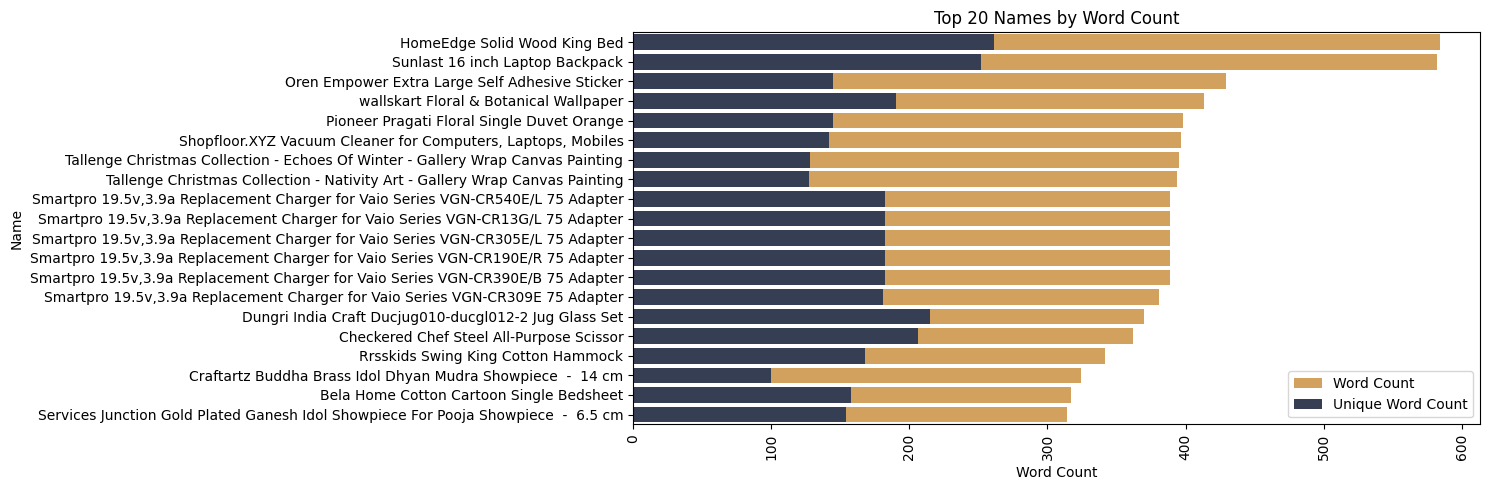

In [19]:
sorted_df = df.sort_values("word_count", ascending=False)    
top_names = sorted_df["product_name"].head(20)  
# top_names = [name[:60] + "..." if len(name) > 50 else name for name in top_names]    
  
top_word_counts = sorted_df["word_count"].head(20)  
top_unique_counts = sorted_df["unique_word_count"].head(20)  
  
plt.figure(figsize=(15, 5))  
  
# Create a horizontal barplot using seaborn    
sns.barplot(y=top_names, x=top_word_counts, orient="h",  color="#e7a44a", label="Word Count")    
sns.barplot(y=top_names, x=top_unique_counts, orient="h",  color="#313c59", label="Unique Word Count")    
  
# Set the title and axes labels    
plt.title("Top 20 Names by Word Count")    
plt.xlabel("Word Count")    
plt.ylabel("Name")    

# Rotate x-axis labels for better readability    
plt.xticks(rotation=90)
    
# Display the plot 
plt.legend()
plt.tight_layout()  
plt.show()  


Je m'interesserai qu'a la category de level 1

In [20]:
df = df.rename(columns={'category_lvl_1': 'cat'})  
df = df[["product_name","cat","description","word_count","unique_word_count"]]
df.head()

,product_name,cat,description,word_count,unique_word_count
0,Elegance Polyester Multicolor Abstract Eyelet ...,home furnishing,Key Features of Elegance Polyester Multicolor ...,236.0,132.0
1,Sathiyas Cotton Bath Towel,baby care,Specifications of Sathiyas Cotton Bath Towel (...,74.0,48.0
2,Eurospa Cotton Terry Face Towel Set,baby care,Key Features of Eurospa Cotton Terry Face Towe...,216.0,124.0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,home furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,143.0,73.0
4,Jaipur Print Cotton Floral King sized Double B...,home furnishing,Key Features of Jaipur Print Cotton Floral Kin...,213.0,111.0


J'effectue un hot hot encoding sur les categories afin de vérifier si il y a une correlation et pour future utilisations

In [21]:
df_encoded = pd.get_dummies(df, columns=["cat"])  
df_encoded.head()

,product_name,description,word_count,unique_word_count,cat_baby care,cat_beauty and personal care,cat_computers,cat_home decor & festive needs,cat_home furnishing,cat_kitchen & dining,cat_watches
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,236.0,132.0,0,0,0,0,1,0,0
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,74.0,48.0,1,0,0,0,0,0,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,216.0,124.0,1,0,0,0,0,0,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,143.0,73.0,0,0,0,0,1,0,0
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,213.0,111.0,0,0,0,0,1,0,0


/var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/ipykernel_17761/676038228.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

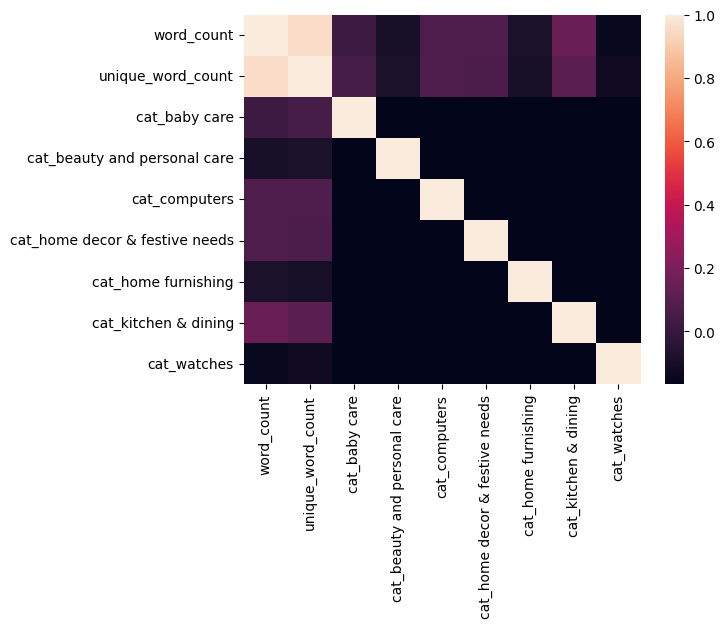

In [22]:
sns.heatmap(df_encoded.corr())

In [23]:
df.head()

,product_name,cat,description,word_count,unique_word_count
0,Elegance Polyester Multicolor Abstract Eyelet ...,home furnishing,Key Features of Elegance Polyester Multicolor ...,236.0,132.0
1,Sathiyas Cotton Bath Towel,baby care,Specifications of Sathiyas Cotton Bath Towel (...,74.0,48.0
2,Eurospa Cotton Terry Face Towel Set,baby care,Key Features of Eurospa Cotton Terry Face Towe...,216.0,124.0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,home furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,143.0,73.0
4,Jaipur Print Cotton Floral King sized Double B...,home furnishing,Key Features of Jaipur Print Cotton Floral Kin...,213.0,111.0


In [24]:

# Étape 1 : Prétraitement  
stemmer = SnowballStemmer("english")  
stop_words = set(stopwords.words('english'))  
  
def preprocess(text):  
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word.isalpha()] # Enlever les caractères non alphabétiques  
    tokens = [stemmer.stem(word) for word in tokens if not word in stop_words]  
    return ' '.join(tokens)  
  
df['description_clean'] = df['description'].apply(preprocess)  
  

In [25]:
df.head()

,product_name,cat,description,word_count,unique_word_count,description_clean
0,Elegance Polyester Multicolor Abstract Eyelet ...,home furnishing,Key Features of Elegance Polyester Multicolor ...,236.0,132.0,key featur eleg polyest multicolor abstract ey...
1,Sathiyas Cotton Bath Towel,baby care,Specifications of Sathiyas Cotton Bath Towel (...,74.0,48.0,specif sathiya cotton bath towel bath towel re...
2,Eurospa Cotton Terry Face Towel Set,baby care,Key Features of Eurospa Cotton Terry Face Towe...,216.0,124.0,key featur eurospa cotton terri face towel set...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,home furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,143.0,73.0,key featur santosh royal fashion cotton print ...
4,Jaipur Print Cotton Floral King sized Double B...,home furnishing,Key Features of Jaipur Print Cotton Floral Kin...,213.0,111.0,key featur jaipur print cotton floral king siz...


In [26]:
origin_df = df.copy()
# Étape 2 : Vectorisation avec TF-IDF  
vectorizer = TfidfVectorizer()  
description_vector = vectorizer.fit_transform(df['description_clean'])  
  
# Ajout des features supplémentaires si nécessaire  
df['word_count'] = df['description'].apply(lambda x: len(x.split()))  
df['unique_word_count'] = df['description'].apply(lambda x: len(set(x.split())))  
  
# Concaténation des features TF-IDF et les features supplémentaires  
X = pd.concat([pd.DataFrame(description_vector.toarray())], axis=1)  
# X = pd.concat([pd.DataFrame(description_vector.toarray()), df[['word_count', 'unique_word_count']].astype(int)], axis=1)  

In [27]:
df.head()

,product_name,cat,description,word_count,unique_word_count,description_clean
0,Elegance Polyester Multicolor Abstract Eyelet ...,home furnishing,Key Features of Elegance Polyester Multicolor ...,230,142,key featur eleg polyest multicolor abstract ey...
1,Sathiyas Cotton Bath Towel,baby care,Specifications of Sathiyas Cotton Bath Towel (...,74,55,specif sathiya cotton bath towel bath towel re...
2,Eurospa Cotton Terry Face Towel Set,baby care,Key Features of Eurospa Cotton Terry Face Towe...,215,145,key featur eurospa cotton terri face towel set...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,home furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,145,80,key featur santosh royal fashion cotton print ...
4,Jaipur Print Cotton Floral King sized Double B...,home furnishing,Key Features of Jaipur Print Cotton Floral Kin...,214,124,key featur jaipur print cotton floral king siz...


In [28]:
X

,0,1,2,3,4,5,6,7,8,9,...,3836,3837,3838,3839,3840,3841,3842,3843,3844,3845
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X.columns = X.columns.astype(str)  

# Étape 3 : Réduction de dimension  
pca = PCA(n_components=2)  
description_2d_pca = pca.fit_transform(X)  
  
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000)  
description_2d_tsne = tsne.fit_transform(X)  
  
umap = UMAP(n_components=2)  
description_2d_umap = umap.fit_transform(X)  

In [30]:
origin_df

,product_name,cat,description,word_count,unique_word_count,description_clean
0,Elegance Polyester Multicolor Abstract Eyelet ...,home furnishing,Key Features of Elegance Polyester Multicolor ...,236.0,132.0,key featur eleg polyest multicolor abstract ey...
1,Sathiyas Cotton Bath Towel,baby care,Specifications of Sathiyas Cotton Bath Towel (...,74.0,48.0,specif sathiya cotton bath towel bath towel re...
2,Eurospa Cotton Terry Face Towel Set,baby care,Key Features of Eurospa Cotton Terry Face Towe...,216.0,124.0,key featur eurospa cotton terri face towel set...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,home furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,143.0,73.0,key featur santosh royal fashion cotton print ...
4,Jaipur Print Cotton Floral King sized Double B...,home furnishing,Key Features of Jaipur Print Cotton Floral Kin...,213.0,111.0,key featur jaipur print cotton floral king siz...
...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,baby care,Oren Empower Extra Large Self Adhesive Sticker...,429.0,145.0,oren empow extra larg self adhes sticker pack ...
1046,Wallmantra Large Vinyl Sticker Sticker,baby care,Wallmantra Large Vinyl Sticker Sticker (Pack o...,290.0,101.0,wallmantra larg vinyl sticker sticker pack pri...
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,baby care,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,37.0,29.0,buy uberlyf extra larg pigment polyvinyl film ...
1048,Wallmantra Medium Vinyl Sticker Sticker,baby care,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,31.0,25.0,buy wallmantra medium vinyl sticker sticker on...


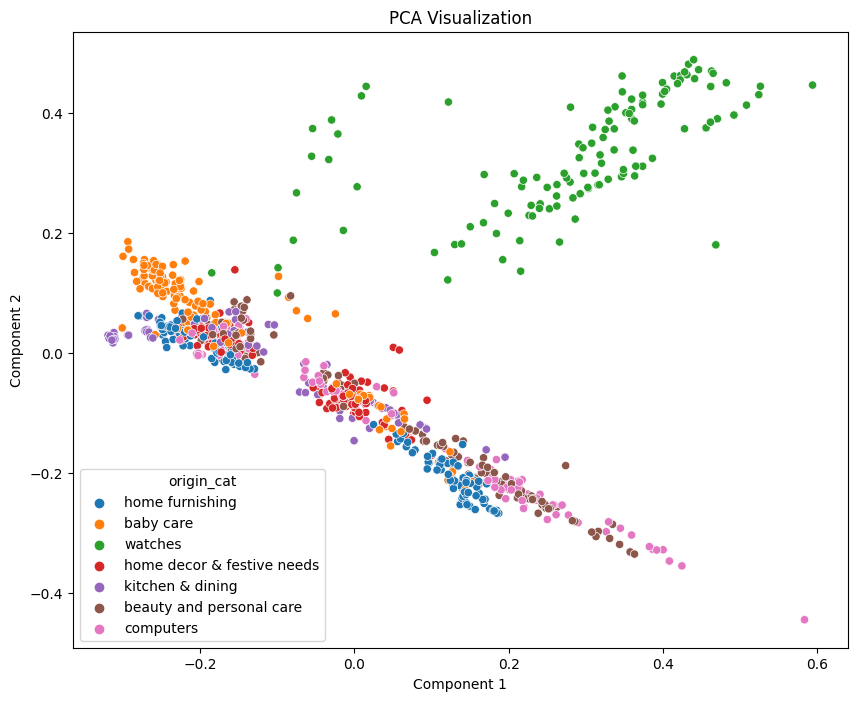

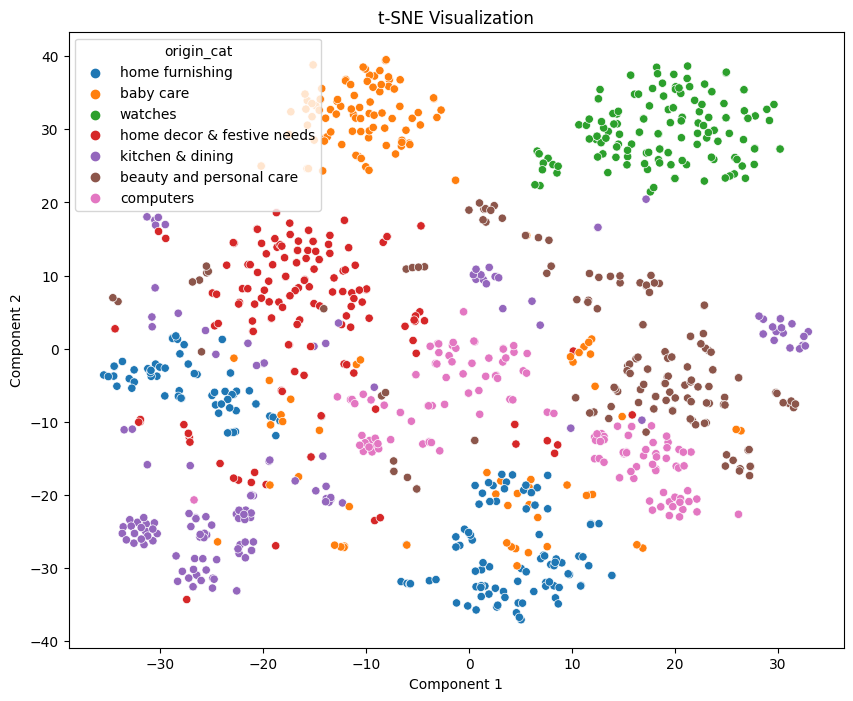

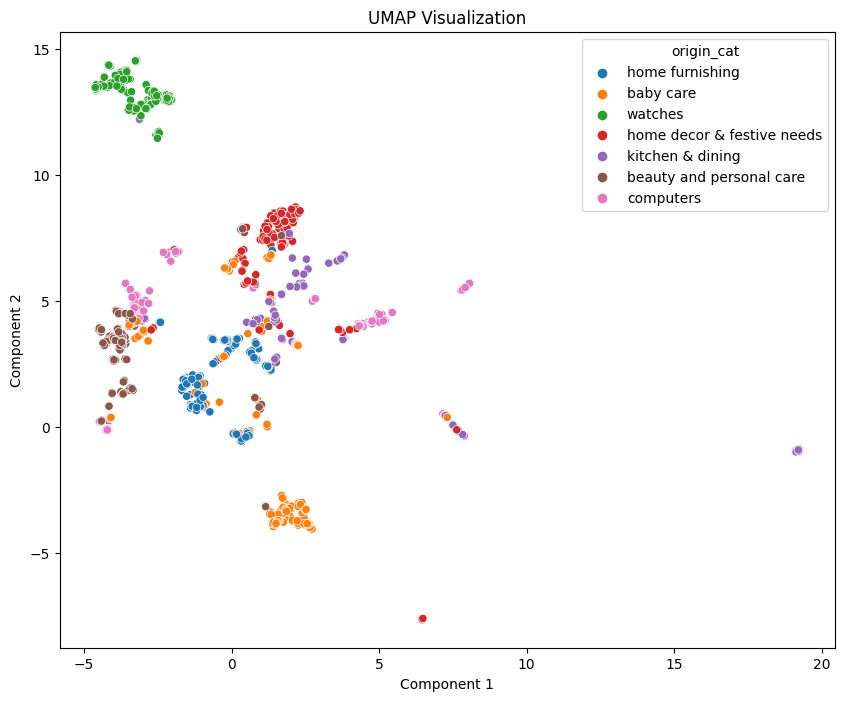

In [31]:
# Étape 5 : Visualisation  
def plot_components(data_2d, title):  
    df_eda = pd.DataFrame(data_2d, columns=['Component 1', 'Component 2'])  
    df_eda['origin_cat'] = origin_df['cat']  
    plt.figure(figsize=(10, 8))  
    sns.scatterplot(x='Component 1', y='Component 2', hue='origin_cat', data=df_eda)  
    plt.xlabel('Component 1')  
    plt.ylabel('Component 2')  
    plt.title(title)  
    plt.show()  
  
# Visualisation avec PCA, t-SNE, UMAP  
plot_components(description_2d_pca, 'PCA Visualization')  
plot_components(description_2d_tsne, 't-SNE Visualization')  
plot_components(description_2d_umap, 'UMAP Visualization')  

In [32]:
origin_df.head()

,product_name,cat,description,word_count,unique_word_count,description_clean
0,Elegance Polyester Multicolor Abstract Eyelet ...,home furnishing,Key Features of Elegance Polyester Multicolor ...,236.0,132.0,key featur eleg polyest multicolor abstract ey...
1,Sathiyas Cotton Bath Towel,baby care,Specifications of Sathiyas Cotton Bath Towel (...,74.0,48.0,specif sathiya cotton bath towel bath towel re...
2,Eurospa Cotton Terry Face Towel Set,baby care,Key Features of Eurospa Cotton Terry Face Towe...,216.0,124.0,key featur eurospa cotton terri face towel set...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,home furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,143.0,73.0,key featur santosh royal fashion cotton print ...
4,Jaipur Print Cotton Floral King sized Double B...,home furnishing,Key Features of Jaipur Print Cotton Floral Kin...,213.0,111.0,key featur jaipur print cotton floral king siz...


In [34]:
from sklearn.metrics import silhouette_score  

# Calculate silhouette score for PCA  
silhouette_pca = silhouette_score(description_2d_pca, origin_df['cat'])  
print("Silhouette Score (PCA):", silhouette_pca)  
  
# Calculate silhouette score for t-SNE  
silhouette_tsne = silhouette_score(description_2d_tsne, origin_df['cat'])  
print("Silhouette Score (t-SNE):", silhouette_tsne)  
  
# Calculate silhouette score for UMAP  
silhouette_umap = silhouette_score(description_2d_umap, origin_df['cat'])  
print("Silhouette Score (UMAP):", silhouette_umap)

Silhouette Score (PCA): -0.02884466449964658
Silhouette Score (t-SNE): 0.13226874
Silhouette Score (UMAP): 0.21718813


/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



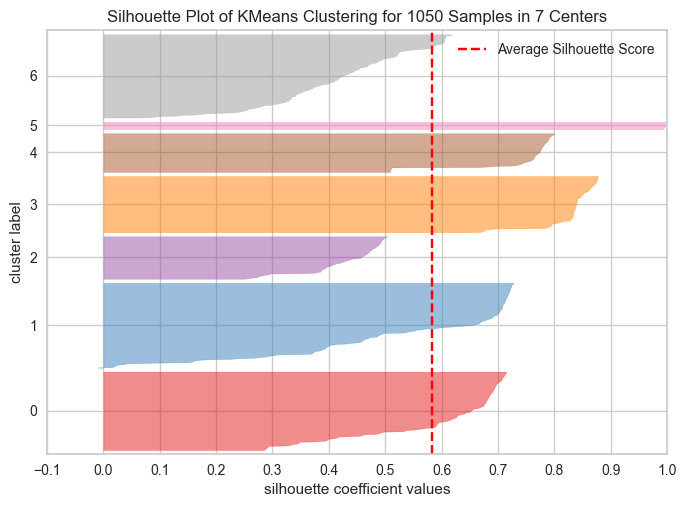

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1050 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
from sklearn.cluster import KMeans  
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=7, random_state=42).fit(description_2d_umap)  

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(description_2d_umap)    # Fit the data to the visualizer
visualizer.poof()

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



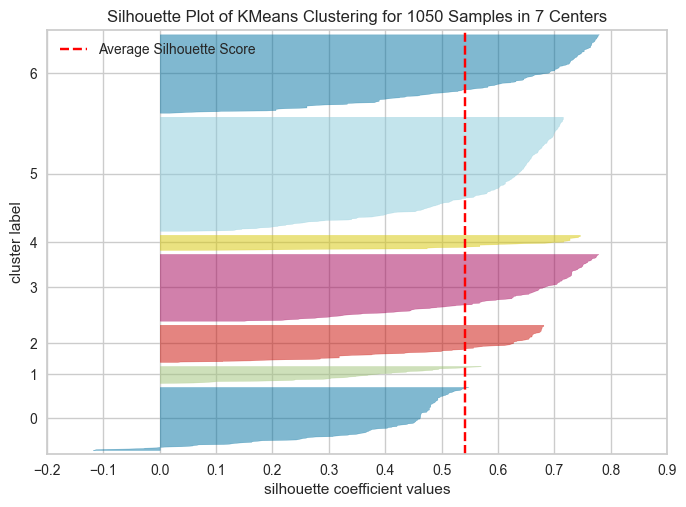

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1050 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
from yellowbrick.cluster import SilhouetteVisualizer  

kmeans = KMeans(n_clusters=7)  

# # Create the SilhouetteVisualizer for PCA  
visualizer_pca = SilhouetteVisualizer(kmeans, colors='yellowbrick')  
visualizer_pca.fit(description_2d_pca, origin_df['cat'])  
visualizer_pca.show()  


/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



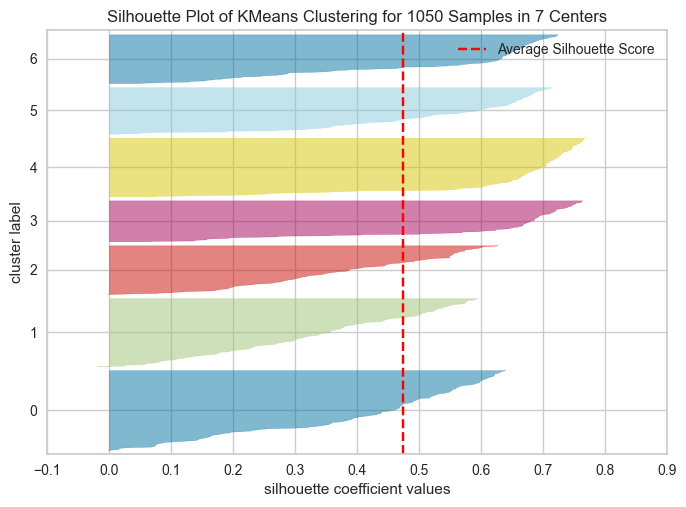

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1050 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
kmeans = KMeans(n_clusters=7)  

# Create the SilhouetteVisualizer for t-SNE  
visualizer_tsne = SilhouetteVisualizer(kmeans, colors='yellowbrick')  
visualizer_tsne.fit(description_2d_tsne, origin_df['cat'])  
visualizer_tsne.show()  
  

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



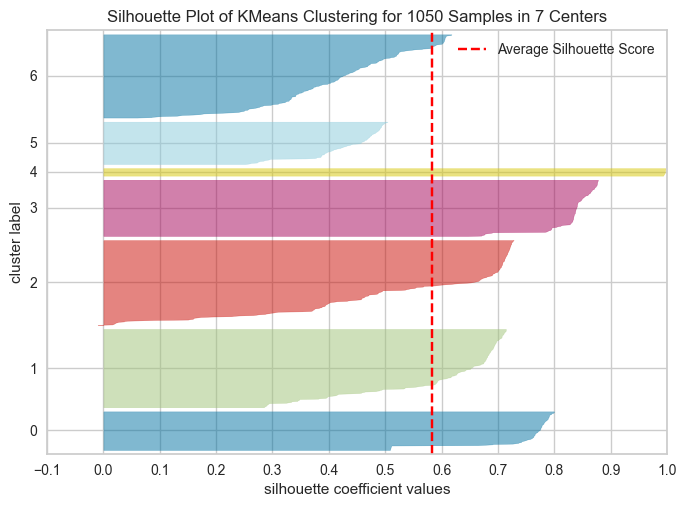

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1050 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
kmeans = KMeans(n_clusters=7)  

# # Create the SilhouetteVisualizer for UMAP  
visualizer_umap = SilhouetteVisualizer(kmeans, colors='yellowbrick')  
visualizer_umap.fit(description_2d_umap, origin_df['cat'])  
visualizer_umap.show()  